In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install helpers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


!cp /content/drive/MyDrive/CSE_455_Project/utils.py .
!cp /content/drive/MyDrive/CSE_455_Project/BirdDataSet.py .
!cp /content/drive/MyDrive/CSE_455_Project/Simple_DLA.py .
from utils import *
from BirdDataSet import BirdDataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
checkpoints = '/content/drive/MyDrive/CSE_455_Project/birds21wi/checkpoint/'
class_to_idx = {}
classes = sorted([str(i) for i in range(555)])
for i in range(len(classes)):
    class_to_idx[classes[i]] = str(i)

cuda:0


In [ ]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# checkpoints = '/content/drive/MyDrive/colab_files/birds/'
# if not os.path.exists(checkpoints):
#     os.makedirs(checkpoints)

In [ ]:
import os
if not os.path.exists('birds21wi'):
    !mkdir birds21wi
    os.chdir('birds21wi')
    !wget https://pjreddie.com/media/files/birds/test.tar
    !wget https://pjreddie.com/media/files/birds/names.txt
    !tar xf test.tar
    !mkdir testing
    !mv test testing
    os.chdir('..')

--2021-03-15 19:30:11--  https://pjreddie.com/media/files/birds/test.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2057210880 (1.9G) [application/octet-stream]
Saving to: ‘test.tar’

test.tar            100%[===================>]   1.92G  89.8MB/s    in 23s     

2021-03-15 19:30:34 (84.0 MB/s) - ‘test.tar’ saved [2057210880/2057210880]

--2021-03-15 19:30:36--  https://pjreddie.com/media/files/birds/names.txt
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13755 (13K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>]  13.43K  --.-KB/s    in 0s      

2021-03-15 19:30:36 (432 MB/s) - ‘names.txt’ saved [13755/13755]



In [1]:
def get_bird_data(augmentation=0):
    transform_train = transforms.Compose([
        transforms.RandomCrop(256, padding=8, padding_mode='edge'), # Take 128x128 crops from padded images
        transforms.RandomHorizontalFlip(),    # 50% of time flip image along y-axis
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
    ])
    # trainset = BirdDataset("/content/drive/MyDrive/CSE_455_Project/birds21wi/h5files/training/*.h5", transform=transform_train)
    trainset = torchvision.datasets.ImageFolder(root='birds21wi/train', transform=transform_train)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
    testset = torchvision.datasets.ImageFolder(root='birds21wi/testing', transform=transform_test)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)
    classes = open("birds21wi/names.txt").read().strip().split("\n")
    class_to_idx = trainset.class_to_idx
    idx_to_class = {int(v): int(k) for k, v in class_to_idx.items()}
    idx_to_name = {k: classes[v] for k,v in idx_to_class.items()}
    return {'train': trainloader, 'test': testloader, 'to_class': idx_to_class, 'to_name':idx_to_name}

data = get_bird_data()

NameError: ignored

In [ ]:
print(data['to_class'])
print(data['to_name'])
print(len(data['to_class']))

{0: 0, 1: 1, 2: 10, 3: 100, 4: 101, 5: 102, 6: 103, 7: 104, 8: 105, 9: 106, 10: 107, 11: 108, 12: 109, 13: 11, 14: 110, 15: 111, 16: 112, 17: 113, 18: 114, 19: 115, 20: 116, 21: 117, 22: 118, 23: 119, 24: 12, 25: 120, 26: 121, 27: 122, 28: 123, 29: 124, 30: 125, 31: 126, 32: 127, 33: 128, 34: 129, 35: 13, 36: 130, 37: 131, 38: 132, 39: 133, 40: 134, 41: 135, 42: 136, 43: 137, 44: 138, 45: 139, 46: 14, 47: 140, 48: 141, 49: 142, 50: 143, 51: 144, 52: 145, 53: 146, 54: 147, 55: 148, 56: 149, 57: 15, 58: 150, 59: 151, 60: 152, 61: 153, 62: 154, 63: 155, 64: 156, 65: 157, 66: 158, 67: 159, 68: 16, 69: 160, 70: 161, 71: 162, 72: 163, 73: 164, 74: 165, 75: 166, 76: 167, 77: 168, 78: 169, 79: 17, 80: 170, 81: 171, 82: 172, 83: 173, 84: 174, 85: 175, 86: 176, 87: 177, 88: 178, 89: 179, 90: 18, 91: 180, 92: 181, 93: 182, 94: 183, 95: 184, 96: 185, 97: 186, 98: 187, 99: 188, 100: 189, 101: 19, 102: 190, 103: 191, 104: 192, 105: 193, 106: 194, 107: 195, 108: 196, 109: 197, 110: 198, 111: 199, 112

torch.Size([128, 3, 128, 128])
torch.LongTensor
 
128


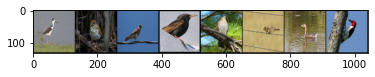

Labels:Harlequin Duck (Male), Common Ground-Dove, Red-tailed Hawk (Light morph immature), Chestnut-backed Chickadee, Northern Saw-whet Owl, Yellow-rumped Warbler (Breeding Myrtle), Clay-colored Sparrow, White-winged Scoter (Male)
[211, 200, 293, 311, 400, 131, 540, 307]
[289, 279, 362, 379, 459, 216, 86, 375]
['Harlequin Duck (Male)', 'Common Ground-Dove', 'Red-tailed Hawk (Light morph immature)', 'Chestnut-backed Chickadee', 'Northern Saw-whet Owl', 'Yellow-rumped Warbler (Breeding Myrtle)', 'Clay-colored Sparrow', 'White-winged Scoter (Male)']


In [ ]:
dataiter = iter(data['train'])
images, labels = dataiter.next()
labels = labels.type(torch.LongTensor)
print(images.shape)
images = images[:8]
print(labels.type())
print(" ")
print(len(labels))

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("Labels:" + ', '.join('%9s' % data['to_name'][labels[j].item()] for j in range(8)))
print([labels[j].item() for j in range(8)])
print([data['to_class'][labels[j].item()] for j in range(8)])
print([data['to_name'][labels[j].item()] for j in range(8)])

In [ ]:
def train(net, dataloader, epochs=1, start_epoch=0, lr=0.01, momentum=0.9, decay=0.0005, 
          verbose=1, print_every=10, state=None, schedule={}, checkpoint_path=None):
    net.to(device)
    net.train()
    losses = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

    # Load previous training state
    if state:
        net.load_state_dict(state['net'])
        optimizer.load_state_dict(state['optimizer'])
        start_epoch = state['epoch']
        losses = state['losses']

    # Fast forward lr schedule through already trained epochs
    for epoch in range(start_epoch):
        if epoch in schedule:
            print ("Learning rate: %f"% schedule[epoch])
            for g in optimizer.param_groups:
                g['lr'] = schedule[epoch]

    for epoch in range(start_epoch, epochs):
        sum_loss = 0.0

        # Update learning rate when scheduled
        if epoch in schedule:
            print ("Learning rate: %f"% schedule[epoch])
            for g in optimizer.param_groups:
                g['lr'] = schedule[epoch]

        for i, batch in enumerate(dataloader, 0):
            inputs = batch[0].to(device)
            labels = batch[1].type(torch.LongTensor)
            labels = batch[1].to(device)
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # autograd magic, computes all the partial derivatives
            optimizer.step() # takes a step in gradient direction

            losses.append(loss.item())
            sum_loss += loss.item()

            if i % print_every == print_every-1:    # print every 10 mini-batches
                if verbose:
                  print('[%d, %5d] loss: %.3f' % (epoch, i + 1, sum_loss / print_every))
                sum_loss = 0.0
        if checkpoint_path:
            state = {'epoch': epoch+1, 'net': net.state_dict(), 'optimizer': optimizer.state_dict(), 'losses': losses}
            torch.save(state, checkpoint_path + 'checkpoint-%d.pkl'%(epoch+1))
    return losses

In [ ]:
resnet = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)
resnet.fc = nn.Sequential(
        nn.Linear(2048, 1024),
        nn.Linear(1024, 555)
        )

losses = train(resnet, data['train'], epochs=20, lr=0.01, print_every=10, checkpoint_path=checkpoints)

In [ ]:
# !cp /content/SimpleDLA.py
# from SimpleDLA import *
#
# net = SimpleDLA()
# net = net.to(device)
# if device == 'cuda':
#     net = torch.nn.DataParallel(net)
#     cudnn.benchmark = True
# overfitted_loss = train(net, data['train'], epochs=5, lr=.01, print_every=10, checkpoint_path=checkpoints)

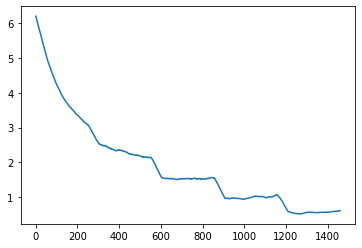

In [ ]:
def smooth(x, size):
  return np.convolve(x, np.ones(size)/size, mode='valid')
plt.plot(smooth(losses,50))

In [ ]:
def predict(net, dataloader, ofname):
    out = open(ofname, 'w')
    out.write("path,class\n")
    net.to(device)
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(dataloader, 0):
            if i%100 == 0:
                print(i)
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            fname, _ = dataloader.dataset.samples[i]
            out.write("test/{},{}\n".format(fname.split('/')[-1], predicted.item()))
    out.close()

In [ ]:
predict(resnet, data['test'], checkpoints + "preds.csv")

In [ ]:
def accuracy(net, dataloader):
  correct = 0
  total = 0
  with torch.no_grad():
      for batch in dataloader:
          images, labels = batch[0].to(device), batch[1].to(device)
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  return correct/total


In [ ]:
print(accuracy(resnet, data['test']))